In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv('dataset.csv', delimiter=',', encoding='ISO-8859-1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Take out the Necessary Features from data set 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
data.describe().T   # T is use to take transpose

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


#### Description of the non numeric features 

In [9]:
data.describe(exclude=['int64','float64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114
Country,541909,38,United Kingdom,495478


#### check for null values

In [10]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### shape of the dataset

In [11]:
data.shape

(541909, 8)

#### Delete all the missing values 

In [12]:
data.dropna(inplace=True)

In [13]:
data.shape


(406829, 8)

In [14]:
data.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### checking of whether negative values present in Quantity and unit Price

In [15]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [16]:
data[data['Quantity']<0].shape[0]

8905

#### Drop all the negative values 

In [17]:

data.drop(data[data['Quantity']<0].index,inplace=True)


In [18]:
data[data['Quantity']<0].shape[0]


0

In [19]:
data.shape

(397924, 8)

#### Calculation of total amount or monetary value

In [20]:
data['Sales'] = data['Quantity']*data['UnitPrice']
new_data = data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data
# spending power of each customer 


,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [21]:
type(new_data)

pandas.core.frame.DataFrame

#### Calculating the number of transactions of each customer

In [22]:
num_trans = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans
# spending power of each customer 


,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [23]:
type(num_trans)

pandas.core.frame.DataFrame

#### Calculating Last Transaction

In [24]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Last Transaction'] = (data['InvoiceDate'].max() - data['InvoiceDate']).dt.days  # it only capture the number of days

In [25]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [26]:
lt = data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [27]:
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [28]:
merge_table = pd.merge(lt,num_trans,how='inner',on='CustomerID')
new_df = pd.merge(merge_table,new_data,how='inner',on='CustomerID')

In [29]:
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


## EDA

#### outlier removals

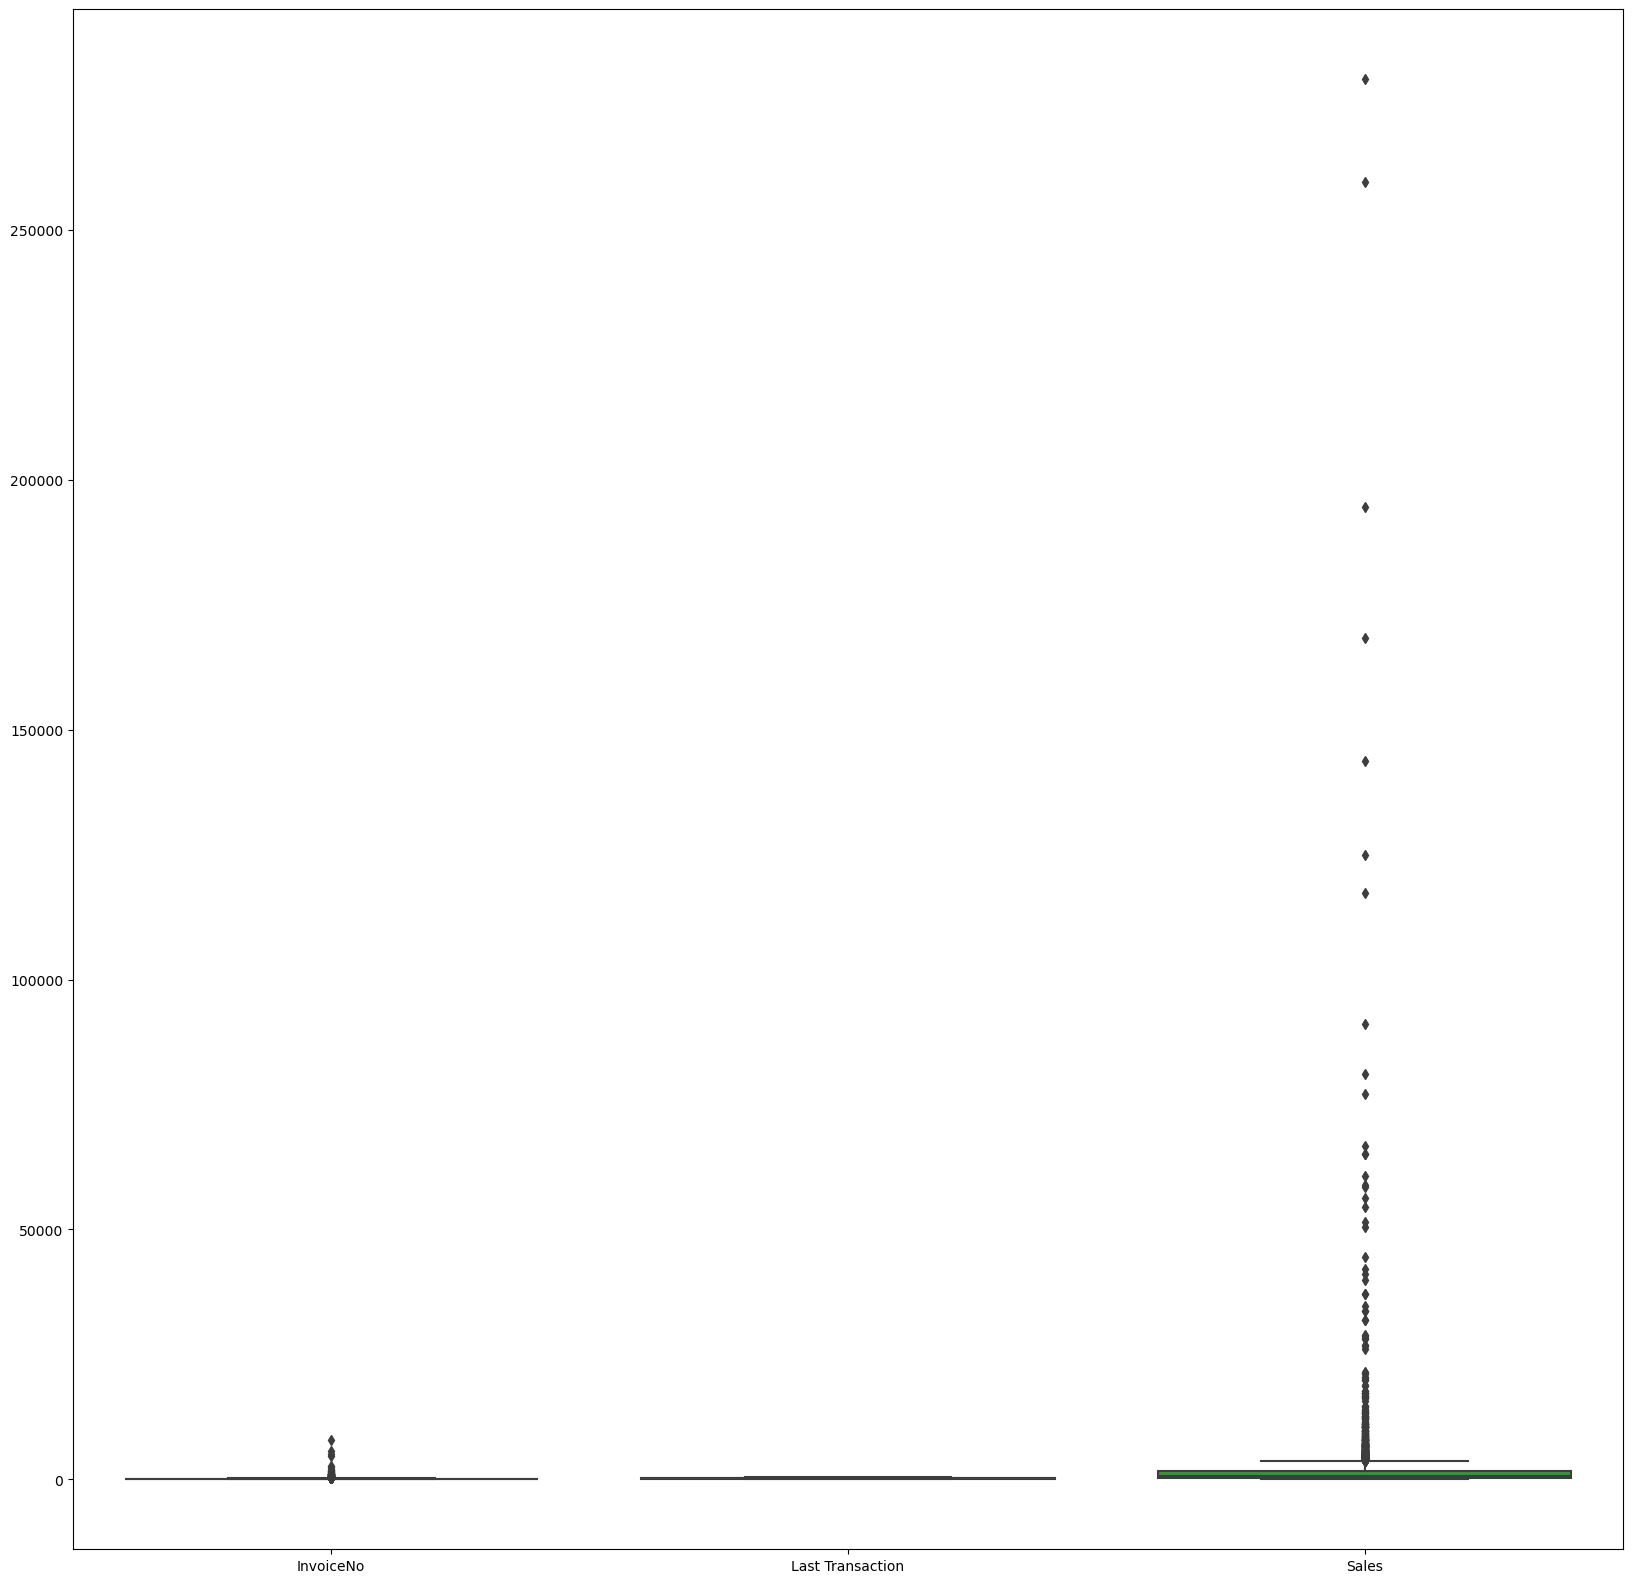

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(data = new_df[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [31]:
IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5*IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5*IQR
new_df_iqr = new_df[(new_df['Sales']<upper_limit) & (new_df['Sales']>lower_limit)]
new_df_iqr.shape

(3923, 5)

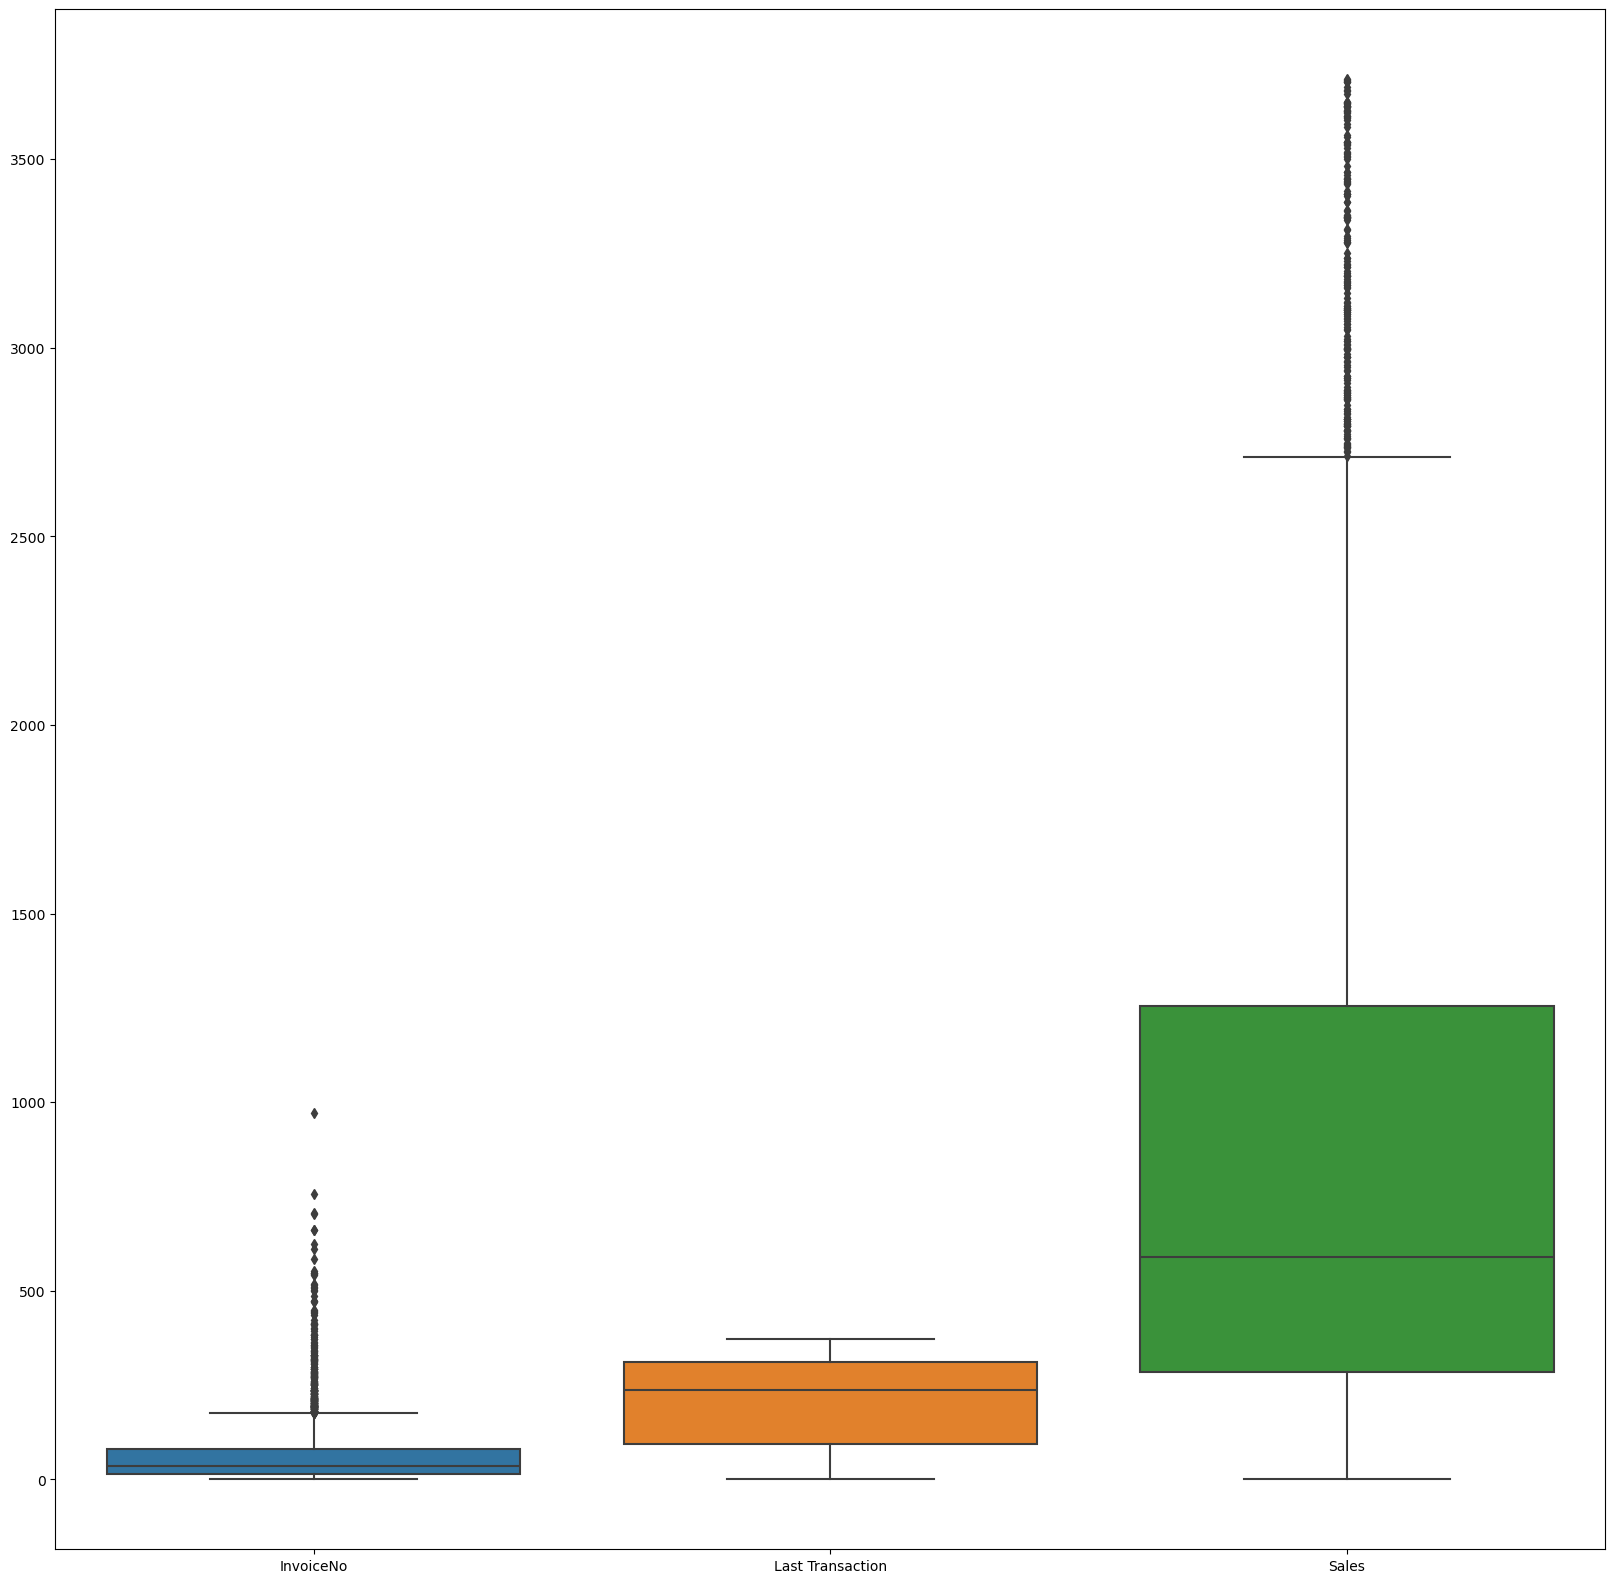

In [32]:
plt.figure(figsize=(20,20))
sns.boxplot(data = new_df_iqr[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [33]:
new_df_iqr.reset_index(drop=True , inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


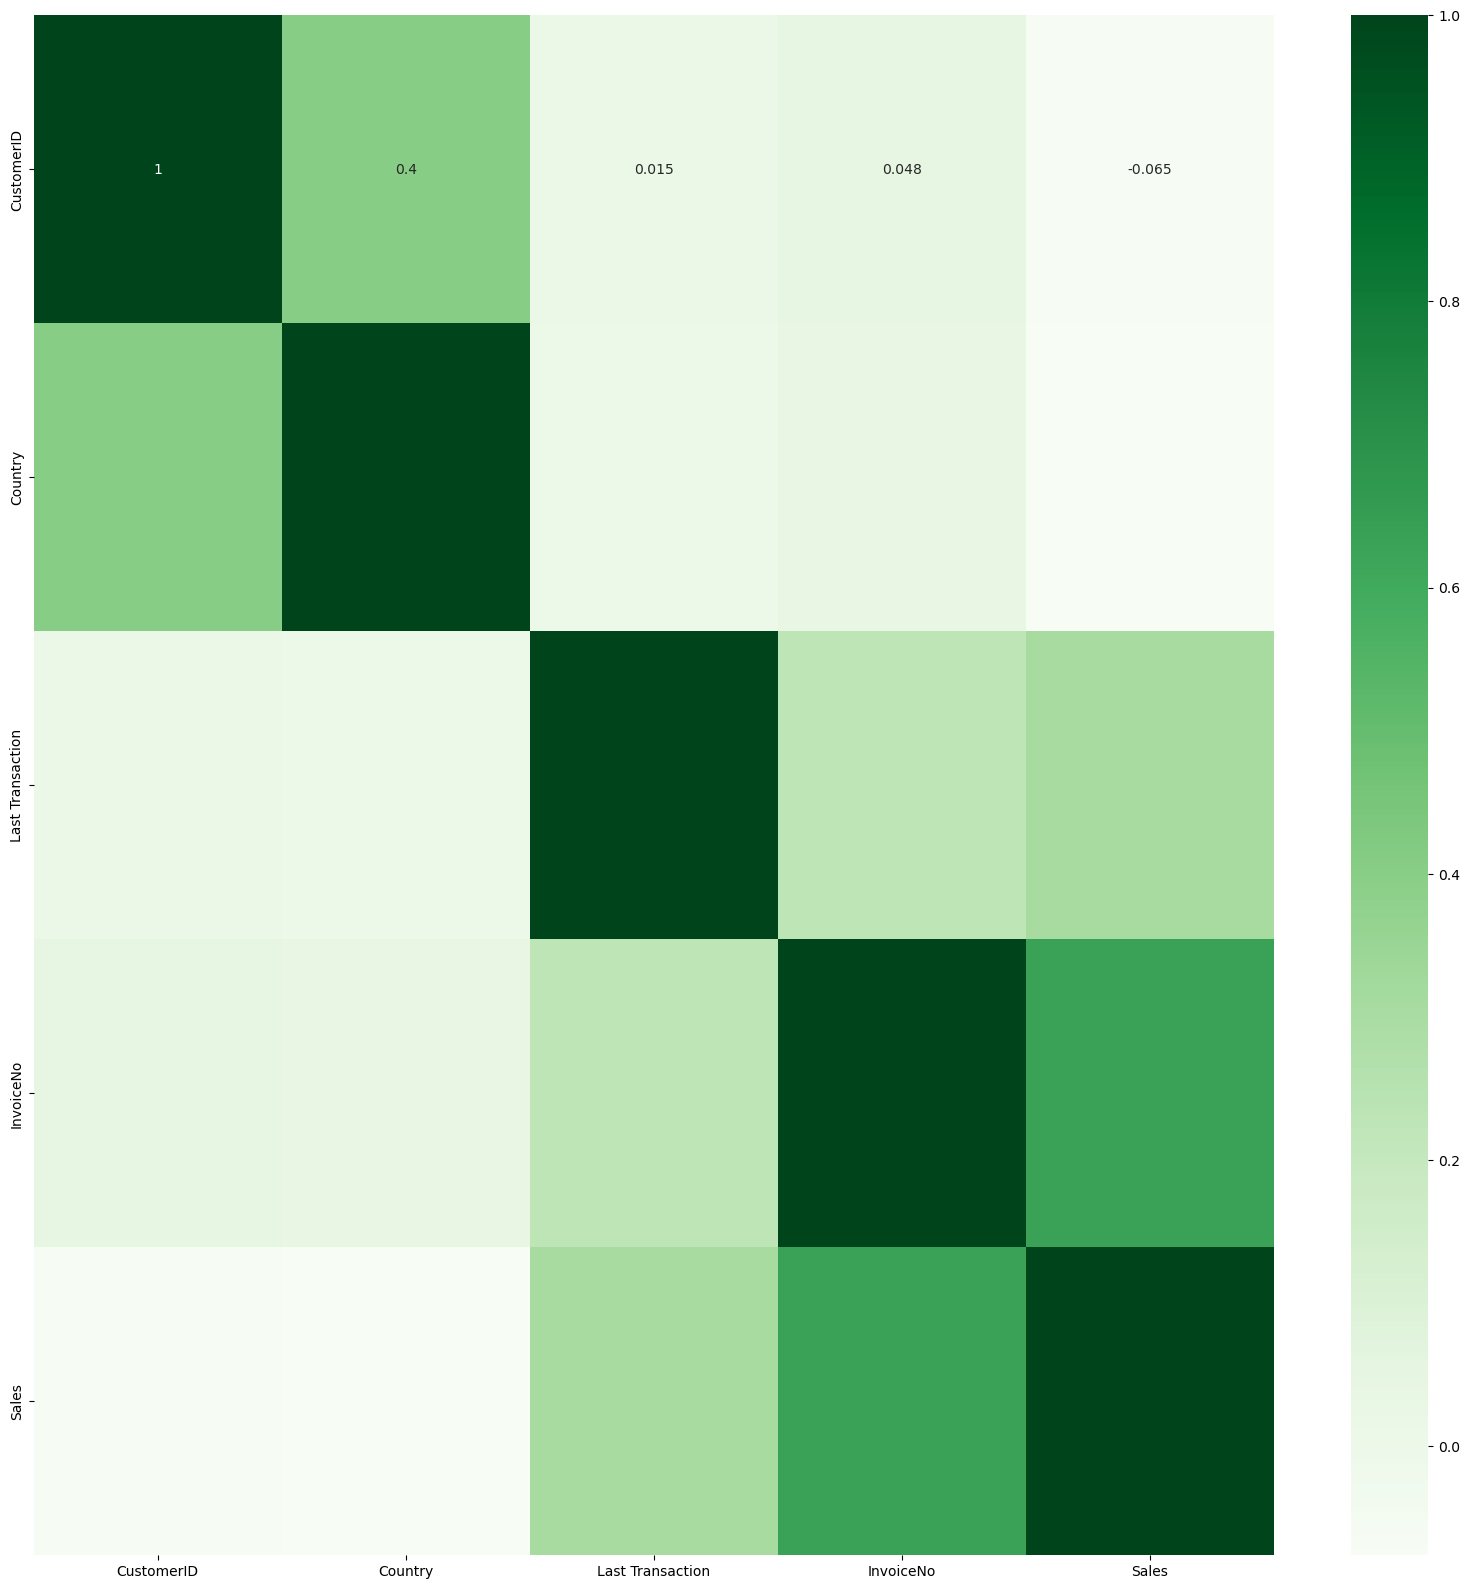

In [34]:
new_df_iqr_encoded = new_df_iqr.copy()
for col in new_df_iqr_encoded.select_dtypes(include=['object']).columns:
    new_df_iqr_encoded[col] = new_df_iqr_encoded[col].astype('category').cat.codes

plt.figure(figsize=(20, 20))
sns.heatmap(new_df_iqr_encoded.corr(), cmap='Greens', annot=True)
plt.show()



### Normalization/Standardization of given Dataset using minmaxScalar

In [35]:
from sklearn.preprocessing import MinMaxScaler
new2_df= new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = ['Last Transaction','InvoiceNo','Sales']
scaled_df['Country'] = new_df_iqr['Country']
scaled_df


,Last Transaction,InvoiceNo,Sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


# 1) K Means Clustering - Plot the garph using elbow method

In [ ]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()

In [37]:
model = KMeans()
model.fit(df_k) # Fit data to model

c:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
km = KMeans(n_clusters=3)
# we find value of best k by using Elbow Method
y_predicted = km.fit_predict(df_k)
df_k['clusters'] = y_predicted
df_k

# now we have three clusters 0 1 2

c:\Users\gupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Last Transaction,InvoiceNo,Sales,clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,0
2,0.828418,0.016512,0.090092,1
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,1
...,...,...,...,...
3918,0.742627,0.009288,0.048656,1
3919,0.482574,0.006192,0.021774,0
3920,0.335121,0.011352,0.047969,0
3921,0.900804,0.779154,0.564388,2


In [39]:
km.cluster_centers_

array([[0.2203999 , 0.04000441, 0.14851846],
       [0.77632417, 0.04272264, 0.15747961],
       [0.79796367, 0.15825709, 0.63324065]])

## Model Evalution

In [48]:
km.labels_

array([2, 0, 1, ..., 0, 2, 2])

In [49]:
## Silhouette_score(i)= (b(i) - a(i)) / max(a(i),b(i))
# b(i)-> distance b/w two clusters
# a(i)-> distance with in the clusters

In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='manhattan')
print(score)



0.8759567447243096


In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.8451857921249731


## 2) Hierarchial Clustering /Agglomerative Clustering

In [51]:
# Use Dendogram to know the clusters 
# bottomUp Approach

from sklearn.cluster import AgglomerativeClustering
hierarchial = AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial = hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']= y_predicted_hierarchial
df_k.head(30)

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial
0,0.957105,0.030960,0.484200,2,1
1,0.048257,0.074303,0.473507,0,2
2,0.828418,0.016512,0.090092,1,0
3,0.793566,0.086687,0.675160,2,1
4,0.544236,0.003096,0.023978,1,0
5,0.619303,0.058824,0.290805,1,0
6,0.571046,0.012384,0.123768,1,0
7,0.871314,0.059856,0.757436,2,1
8,0.402145,0.018576,0.314691,0,2
9,0.536193,0.132095,0.717194,2,1


In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, y_predicted_hierarchial, metric='manhattan')
print(score)


0.8809423186357312


In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, y_predicted_hierarchial, metric='euclidean')
print(score)


0.8509687525770326


# 3) DBScan Clustering

#### Density Based Spatial Clustering of Applications with Noise

##### We have two hyperparameters epsilon and minPoints

##### a) epsilon -> radius of clusters


##### b) minpoints = number of points allowed in the cluster

In [55]:
from sklearn.cluster import DBSCAN
DBscanModel = DBSCAN(eps = 0.2 , min_samples=4)
y_predicted_dbscan = DBscanModel.fit_predict(df_k)
df_k['cluster_dbScan'] = y_predicted_dbscan
df_k

,Last Transaction,InvoiceNo,Sales,clusters,clusters_hierarchial,cluster_dbScan
0,0.957105,0.030960,0.484200,2,1,0
1,0.048257,0.074303,0.473507,0,2,1
2,0.828418,0.016512,0.090092,1,0,2
3,0.793566,0.086687,0.675160,2,1,0
4,0.544236,0.003096,0.023978,1,0,2
...,...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,1,0,2
3919,0.482574,0.006192,0.021774,0,2,1
3920,0.335121,0.011352,0.047969,0,2,1
3921,0.900804,0.779154,0.564388,2,1,0


In [56]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, y_predicted_dbscan, metric='euclidean')
print(score)

0.8797514949504138


In [57]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(df_k, y_predicted_dbscan, metric='manhattan')
print(score)

0.9080181252699534
